# Investment Simulation: Dollar-Cost Averaging (DCA)

This notebook simulates monthly investments of $100 in Bitcoin (BTC-USD) and the S&P 500 (^GSPC) from 2020-01-01 to present. Portfolio growth, drawdowns, and volatility are compared.

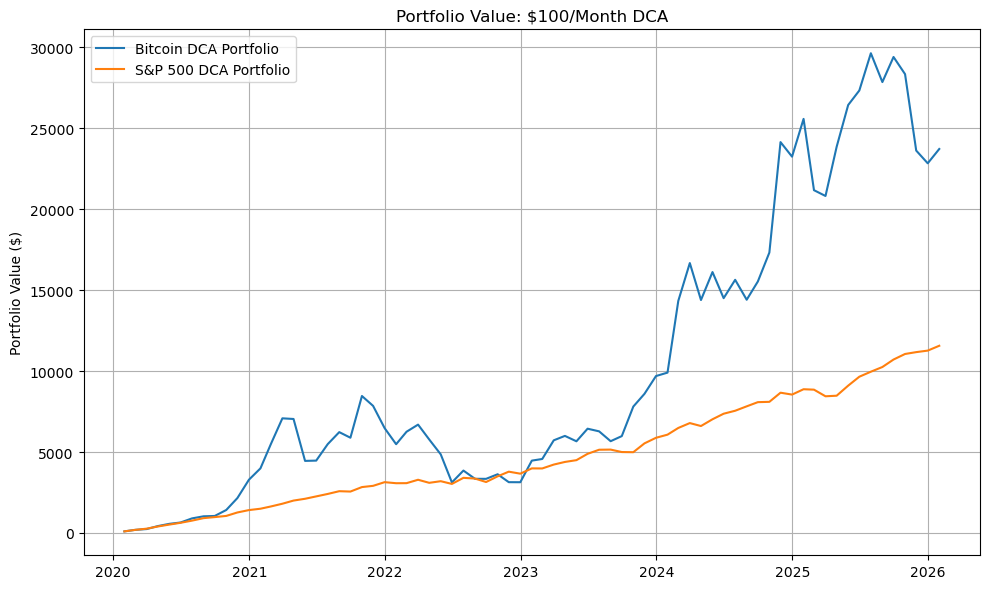

Final Bitcoin portfolio value: $23718.05
Final S&P 500 portfolio value: $11563.83


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load daily price data
df = pd.read_csv('data/raw/synthetic_btc_sp500.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Resample to month-end prices
monthly = df.resample('M').last()

# Simulate $100 invested at each month-end
btc_invest = 100
sp_invest = 100
btc_units = []
sp_units = []
btc_total = 0
sp_total = 0
for idx, row in monthly.iterrows():
    btc_total += btc_invest / row['BTC_Close']
    sp_total += sp_invest / row['SP500_Close']
    btc_units.append(btc_total)
    sp_units.append(sp_total)

monthly['BTC_Units'] = btc_units
monthly['SP500_Units'] = sp_units
monthly['BTC_Portfolio'] = monthly['BTC_Units'] * monthly['BTC_Close']
monthly['SP500_Portfolio'] = monthly['SP500_Units'] * monthly['SP500_Close']

# Plot portfolio growth
plt.figure(figsize=(10,6))
plt.plot(monthly.index, monthly['BTC_Portfolio'], label='Bitcoin DCA Portfolio')
plt.plot(monthly.index, monthly['SP500_Portfolio'], label='S&P 500 DCA Portfolio')
plt.title('Portfolio Value: $100/Month DCA')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final values
print(f'Final Bitcoin portfolio value: ${monthly["BTC_Portfolio"].iloc[-1]:.2f}')
print(f'Final S&P 500 portfolio value: ${monthly["SP500_Portfolio"].iloc[-1]:.2f}')

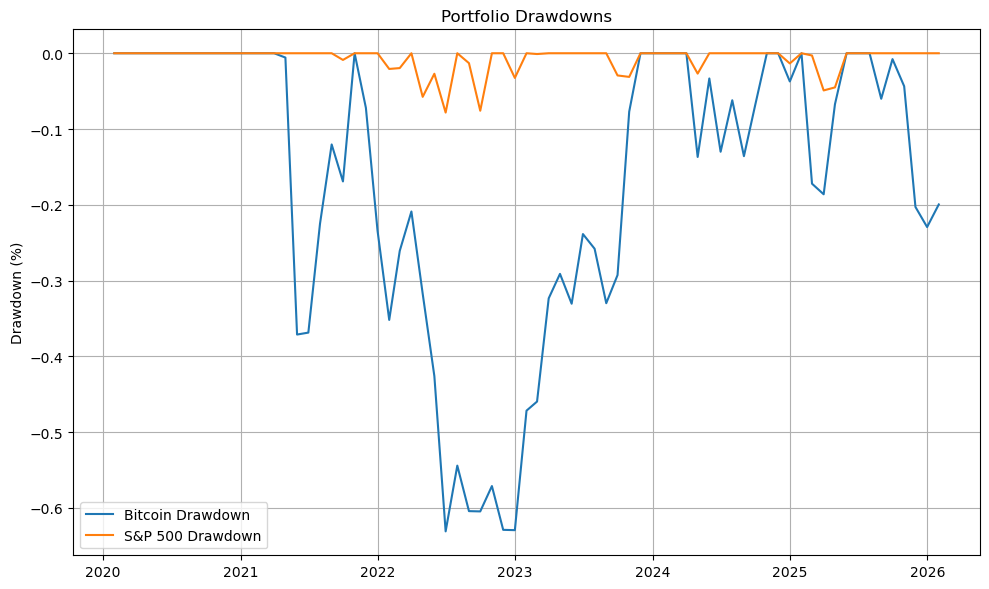

Annualized Volatility (BTC Portfolio): 79.51%
Annualized Volatility (S&P 500 Portfolio): 47.40%
Max Drawdown (BTC Portfolio): -63.11%
Max Drawdown (S&P 500 Portfolio): -7.83%


In [4]:
# Calculate drawdowns and volatility for both portfolios

def calculate_drawdown(series):
    cumulative_max = series.cummax()
    drawdown = (series - cumulative_max) / cumulative_max
    return drawdown

monthly['BTC_Drawdown'] = calculate_drawdown(monthly['BTC_Portfolio'])
monthly['SP500_Drawdown'] = calculate_drawdown(monthly['SP500_Portfolio'])

btc_vol = monthly['BTC_Portfolio'].pct_change().std() * (12 ** 0.5)
sp_vol = monthly['SP500_Portfolio'].pct_change().std() * (12 ** 0.5)

plt.figure(figsize=(10,6))
plt.plot(monthly.index, monthly['BTC_Drawdown'], label='Bitcoin Drawdown')
plt.plot(monthly.index, monthly['SP500_Drawdown'], label='S&P 500 Drawdown')
plt.title('Portfolio Drawdowns')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Annualized Volatility (BTC Portfolio): {btc_vol:.2%}')
print(f'Annualized Volatility (S&P 500 Portfolio): {sp_vol:.2%}')
print(f'Max Drawdown (BTC Portfolio): {monthly["BTC_Drawdown"].min():.2%}')
print(f'Max Drawdown (S&P 500 Portfolio): {monthly["SP500_Drawdown"].min():.2%}')

## Portfolio Risk Analysis
- The chart above shows the historical drawdowns for both Bitcoin and S&P 500 DCA portfolios.
- Annualized volatility and maximum drawdown are calculated for each portfolio.
- Bitcoin typically exhibits higher volatility and deeper drawdowns compared to the S&P 500, reflecting its risk profile.
- These metrics help compare risk-adjusted performance between the two investment strategies.